In [36]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

* **Normal** - A symmetric, bell-shaped distribution defined by its mean and standard deviation, where data clusters around the mean and probabilities taper off equally in both directions.
* **Exponential** - A continuous distribution modeling the time between events in a Poisson process, characterized by a constant rate parameter.
* **Chi-Squared** - A distribution of the sum of the squares of independent standard normal variables, commonly used in hypothesis testing and variance estimation.
* **Uniform Distribution** - A distribution where all outcomes in a defined range between two borders aa and bb are equally likely.

* **Distribution mean** - The mean (or expected value) of a distribution is the average of all possible values weighted by their probabilities. It represents the central location of the distribution.
* **Distribution Variance** - The variance of a distribution measures the spread of its values around the mean.
* **Sample Mean** - The sample mean is the average of a finite set of observed data points.
* **Sample Variance** - The sample variance measures the spread of the sample data around the sample mean.

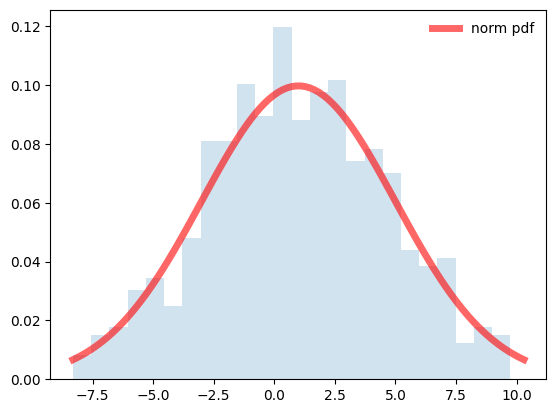

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 0.8369553312652298
Sample variance: 16.422471353483363


In [ ]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

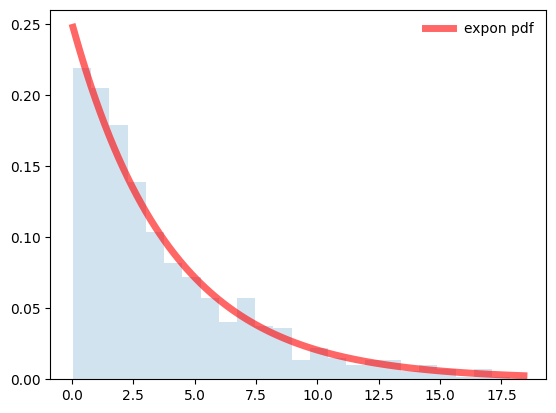

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 4.021595974816116
Sample variance: 17.269578429549618


In [ ]:
#Exponential
#here goes your code
rv_expon = expon(scale = 4)
x = np.linspace(rv_expon.ppf(0.01), rv_expon.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_expon.pdf(x), 'r-', lw=5, alpha=0.6, label='expon pdf')
r = rv_expon.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])
ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_expon.stats(moments='m')))
print("Distribution variance: {0}".format(rv_expon.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

#hint: expon

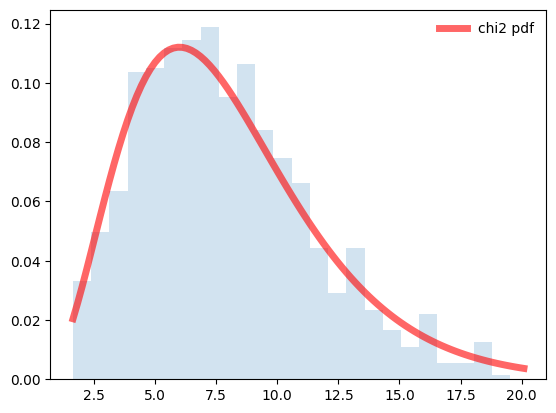

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 8.083119167325602
Sample variance: 16.26357826761184


In [ ]:
#chi2
#here goes your code
rv_chi2 = chi2(df=8)
x = np.linspace(rv_chi2.ppf(0.01), rv_chi2.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_chi2.pdf(x), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
r = rv_chi2.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])
ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_chi2.stats(moments='m')))
print("Distribution variance: {0}".format(rv_chi2.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))


#hint: chi2

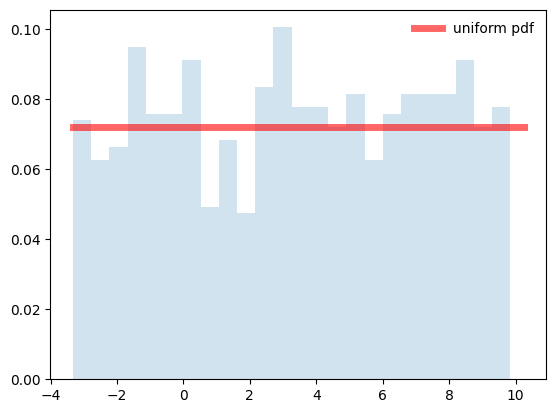

Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.516555935020344
Sample variance: 15.693554004940047


In [ ]:
#uniform

#here goes your code
rv_uniform = uniform(loc=-2*np.sqrt(3), scale=8*np.sqrt(3))
x = np.linspace(rv_uniform.ppf(0.01), rv_uniform.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
r = rv_uniform.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=x[::4])
ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_uniform.stats(moments='m')))
print("Distribution variance: {0}".format(rv_uniform.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))


#hint: uniform

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample.

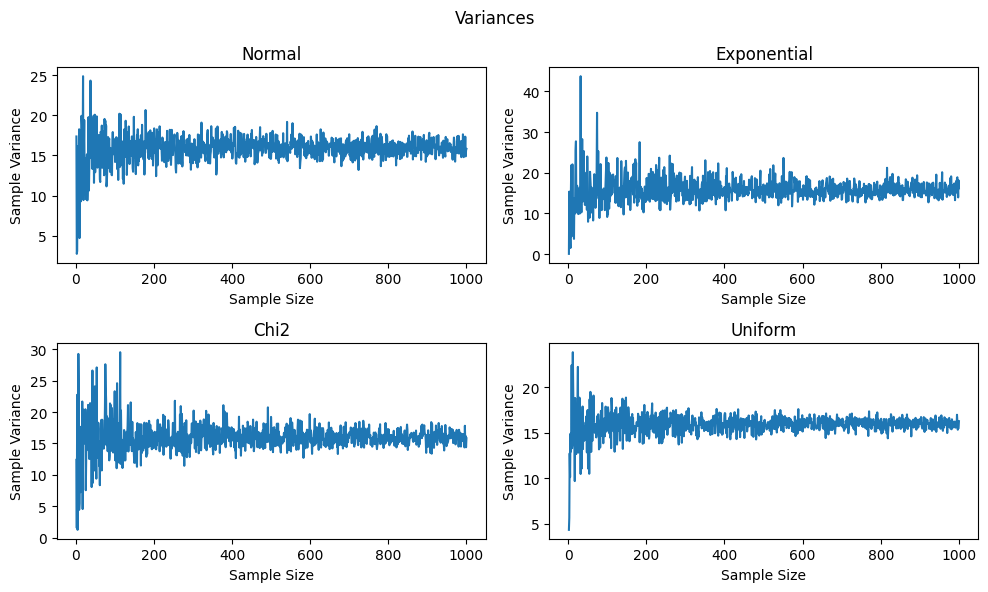

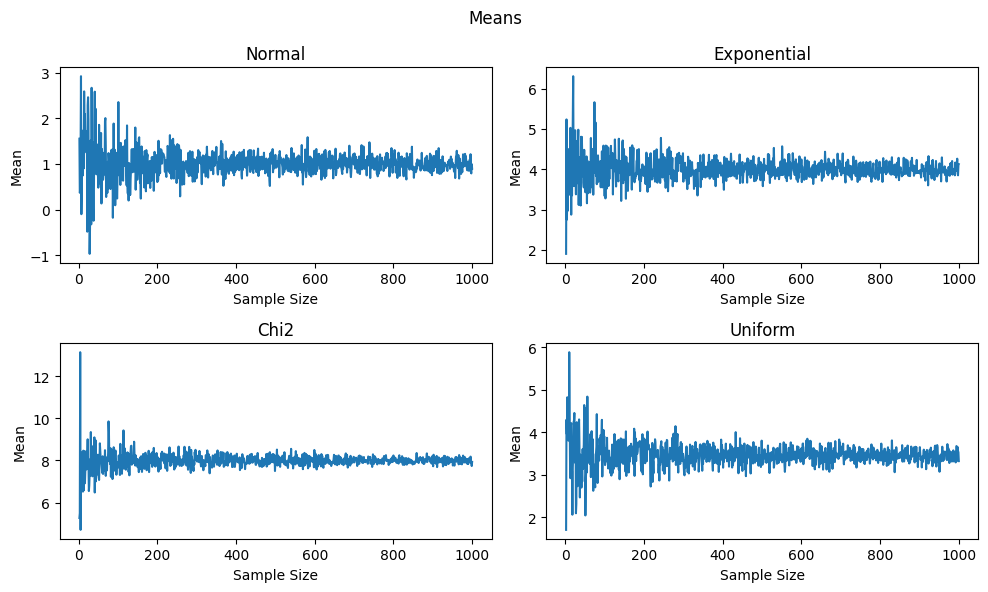

In [ ]:
rv_norm = norm(loc=1, scale=4)
rv_expon = expon(scale=4)
rv_chi2 = chi2(df=8)
rv_uniform = uniform(loc=-2*np.sqrt(3), scale=8*np.sqrt(3))

distributions = [rv_norm, rv_expon, rv_chi2, rv_uniform]
dist_names = ['Normal', 'Exponential', 'Chi-squared', 'Uniform']
means = []
variances = []

for dist, dist_name in zip(distributions, dist_names):
    sample_means = []
    sample_variances = []
    sample_sizes = range(2, 1001)

    for N in sample_sizes:
        samples = dist.rvs(size=N)
        sample_means.append(np.mean(samples))
        sample_variances.append(np.var(samples))
    means.append(sample_means)
    variances.append(sample_variances)


fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0,0].plot(sample_sizes, variances[0])
axes[0,0].set_xlabel('Sample Size')
axes[0,0].set_ylabel('Sample Variance')
axes[0,0].set_title(f'Normal')

axes[0,1].plot(sample_sizes, variances[1])
axes[0,1].set_xlabel('Sample Size')
axes[0,1].set_ylabel('Sample Variance')
axes[0,1].set_title(f'Exponential')

axes[1,0].plot(sample_sizes, variances[2])
axes[1,0].set_xlabel('Sample Size')
axes[1,0].set_ylabel('Sample Variance')
axes[1,0].set_title(f'Chi2')

axes[1,1].plot(sample_sizes, variances[3])
axes[1,1].set_xlabel('Sample Size')
axes[1,1].set_ylabel('Sample Variance')
axes[1,1].set_title(f'Uniform')

fig.suptitle('Variances')
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0,0].plot(sample_sizes, means[0])
axes[0,0].set_xlabel('Sample Size')
axes[0,0].set_ylabel('Mean')
axes[0,0].set_title(f'Normal')

axes[0,1].plot(sample_sizes, means[1])
axes[0,1].set_xlabel('Sample Size')
axes[0,1].set_ylabel('Mean')
axes[0,1].set_title(f'Exponential')

axes[1,0].plot(sample_sizes, means[2])
axes[1,0].set_xlabel('Sample Size')
axes[1,0].set_ylabel('Mean')
axes[1,0].set_title(f'Chi2')

axes[1,1].plot(sample_sizes, means[3])
axes[1,1].set_xlabel('Sample Size')
axes[1,1].set_ylabel('Mean')
axes[1,1].set_title(f'Uniform')
fig.suptitle('Means')
plt.tight_layout()
plt.show()

Both variances and Means stabilize after some samples (around 200).

## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1.

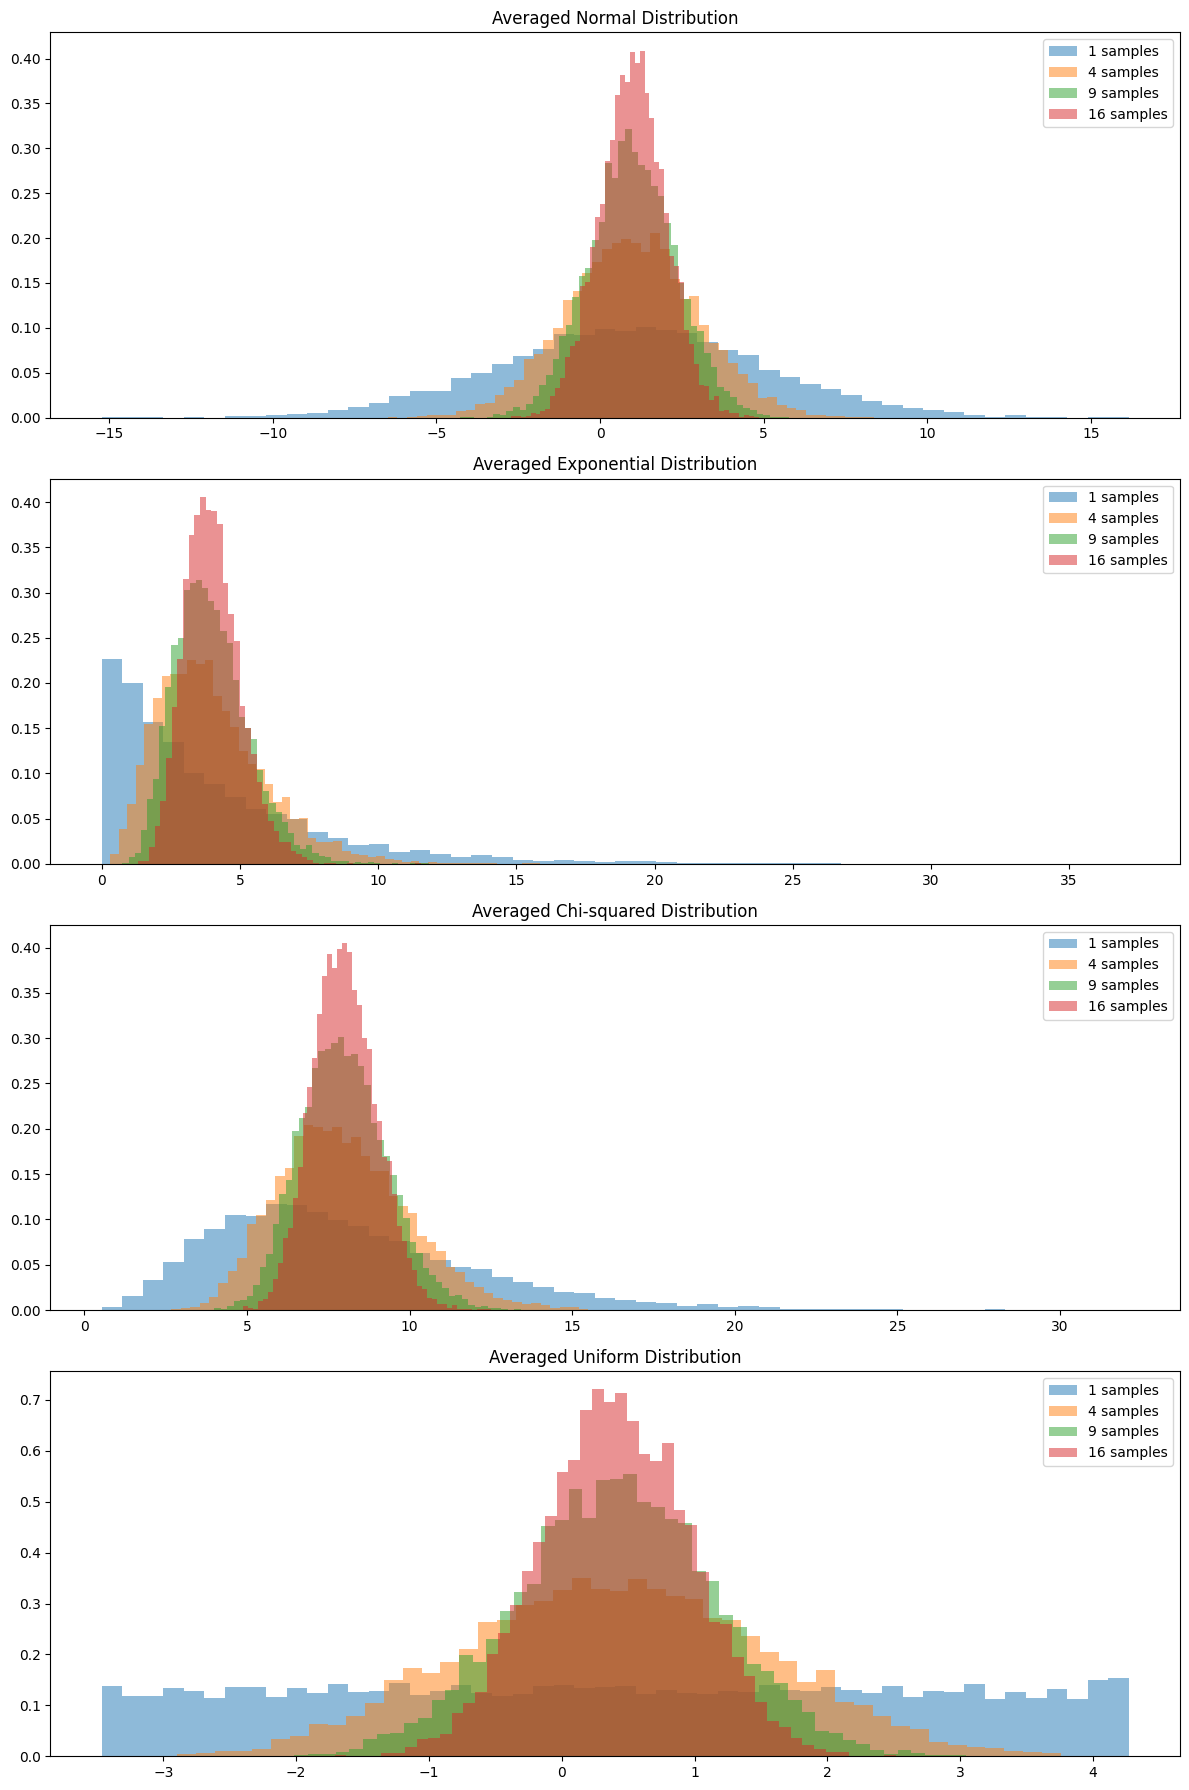

In [ ]:
#here goes your code
mu, sigma = 1, 4
lambda_exp = 1 / 4
df_chi2 = 8
a_uniform, b_uniform = -2 * np.sqrt(3), 6 - np.sqrt(3)


def compute_averages(distribution, N, sample_size=10000):
    samples = distribution.rvs(size=(sample_size, N))
    return samples.mean(axis=1)

N_values = [1, 4, 9, 16]
plt.figure(figsize=(12, 18))

# Normal distribution
plt.subplot(4, 1, 1)
for N in N_values:
    averages = compute_averages(norm(loc=mu, scale=sigma), N)
    plt.hist(averages, bins=50, alpha=0.5, density=True, label=f'{N} samples')
plt.title('Averaged Normal Distribution')
plt.legend()

# Exponential distribution
plt.subplot(4, 1, 2)
for N in N_values:
    averages = compute_averages(expon(scale=1/lambda_exp), N)
    plt.hist(averages, bins=50, alpha=0.5, density=True, label=f'{N} samples')
plt.title('Averaged Exponential Distribution')
plt.legend()

# Chi-squared distribution
plt.subplot(4, 1, 3)
for N in N_values:
    averages = compute_averages(chi2(df=df_chi2), N)
    plt.hist(averages, bins=50, alpha=0.5, density=True, label=f'{N} samples')
plt.title('Averaged Chi-squared Distribution')
plt.legend()

# Uniform distribution
plt.subplot(4, 1, 4)
for N in N_values:
    averages = compute_averages(uniform(loc=a_uniform, scale=b_uniform - a_uniform), N)
    plt.hist(averages, bins=50, alpha=0.5, density=True, label=f'{N} samples')
plt.title('Averaged Uniform Distribution')
plt.legend()

plt.tight_layout()
plt.show()

With increasment of sample size the density of distribution also increases.

# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4.
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

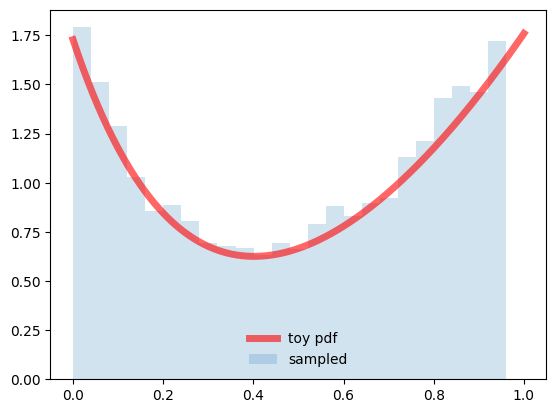

In [ ]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C

x = np.linspace(0,1,1000)

def accept_rejection_sampling(dist, size=1):
    samples = []
    max_val = max(dist)

    while len(samples) < size:
        x_proposal = np.random.uniform(0, 1)

        y_uniform = np.random.uniform(0, max_val)

        if y_uniform <= toy_dist(x_proposal):
            samples.append(x_proposal)

    return np.array(samples)



samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

Histogram matches the shape of the toy PDF closely, validating the sampling process.

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0,2$\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

Version 1


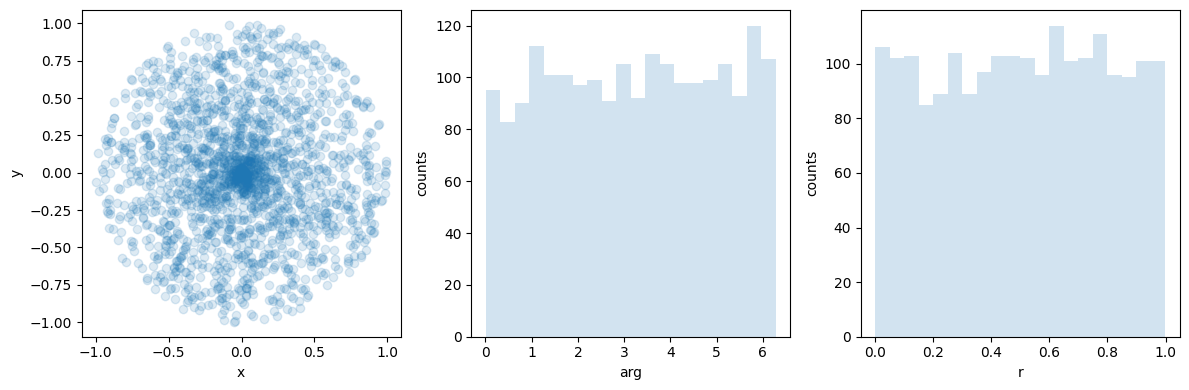

Version 2


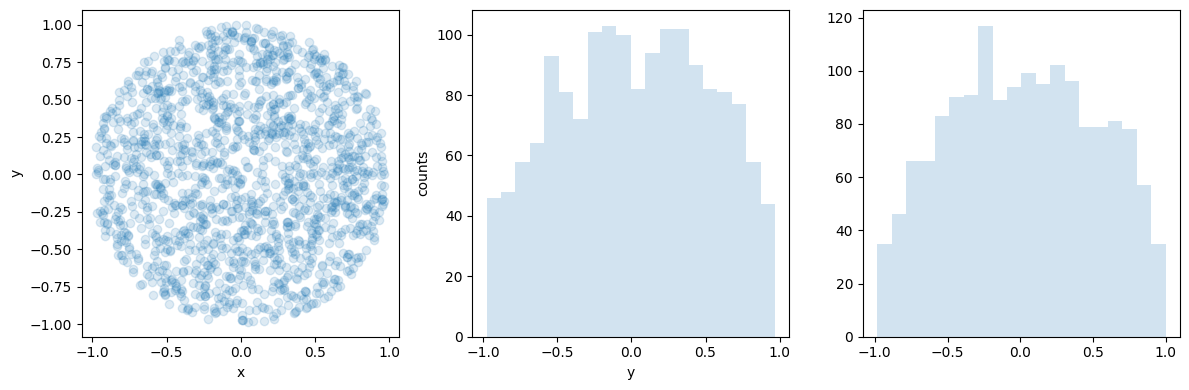

In [ ]:
N = 2000
#Version1
#here goes your code
radius = np.random.uniform(0, 1, N)
angle = np.random.uniform(0, 2 * np.pi, N)
x1 = radius * np.cos(angle)
y1 = radius * np.sin(angle)

print("Version 1")
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(x1, y1, marker='o', alpha=0.15)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].hist(angle, bins=20, alpha=0.2, density=False)
ax[1].set_xlabel('arg')
ax[1].set_ylabel('counts')
ax[2].hist(radius, bins=20, alpha=0.2, density=False)
ax[2].set_xlabel('r')
ax[2].set_ylabel('counts')

plt.tight_layout()
plt.show()

#Version2
#here goes your code
x2 = np.random.uniform(-1, 1, N)
y2 = np.random.uniform(-1, 1, N)
mask = x2**2 + y2**2 <= 1
x2 = x2[mask][:N]
y2 = y2[mask][:N]

print("Version 2")
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(x2, y2, marker='o', alpha=0.15)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].hist(x2, bins=20, alpha=0.2, density=False)
ax[1].set_xlabel('x')
ax[1].set_ylabel('counts')
ax[2].hist(y2, bins=20, alpha=0.2, density=False)
ax[1].set_xlabel('y')
ax[1].set_ylabel('counts')

plt.tight_layout()
plt.show()

Version 3


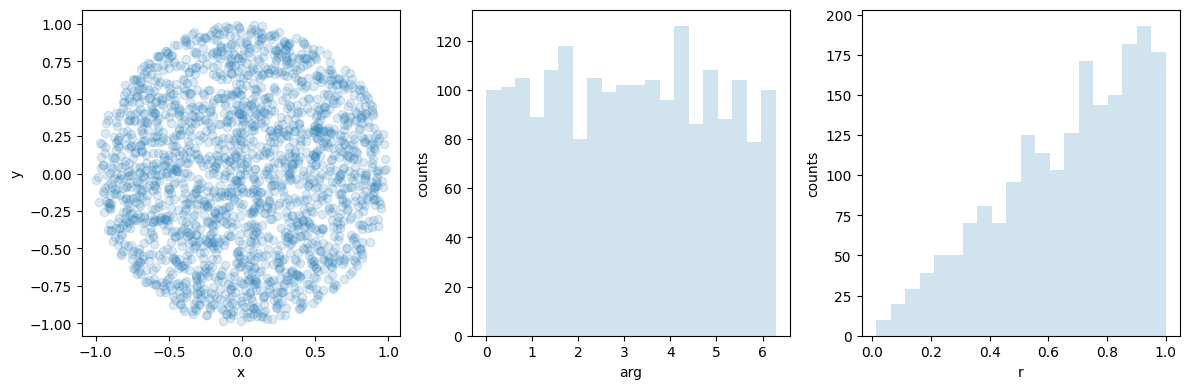

In [ ]:
#Version3
#here goes your code
radius3 = np.sqrt(np.random.uniform(0, 1, N))
angle3 = np.random.uniform(0, 2 * np.pi, N)
x3 = radius3 * np.cos(angle3)
y3 = radius3 * np.sin(angle3)


print("Version 3")
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(x3, y3, marker='o', alpha=0.15)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].hist(angle3, bins=20, alpha=0.2, density=False)
ax[1].set_xlabel('arg')
ax[1].set_ylabel('counts')
ax[2].hist(radius3, bins=20, alpha=0.2, density=False)
ax[2].set_xlabel('r')
ax[2].set_ylabel('counts')

plt.tight_layout()
plt.show()

Key approach in version 3 was applying square root to radius. Taking the square root of the radius changes the distribution of the radius in a way that compensates for the inherent bias towards the center when sampling in polar coordinates. This results in a uniform distribution of points within the disk.

## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

In [ ]:
S = 100 # Decrease if computations take too long
plane = np.zeros((S,S))
plane_counts = np.zeros((S,S))
plane[0] = np.cos(np.linspace(-1.5,1.5,S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1,1,S)*2*np.pi)
plane[:,0] = np.cos(np.linspace(-0.5,0.5,S)*2*np.pi)
plane[:,-1] = -2+np.linspace(-1,1,S)**2

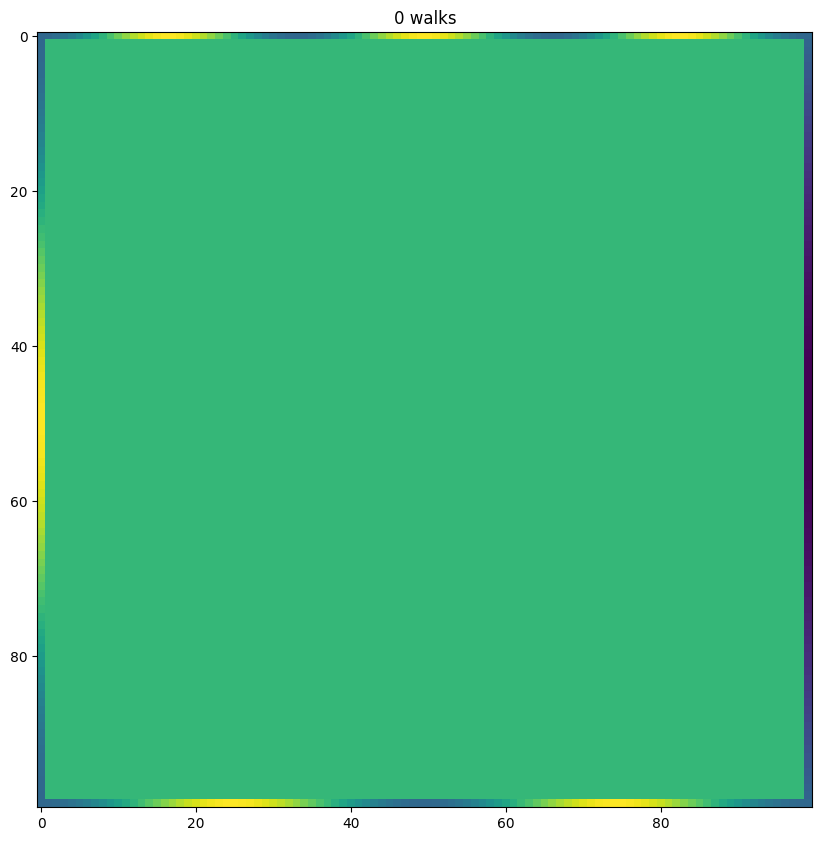

In [ ]:
plt.figure(figsize=(10,15))
plt.title("0 walks")
plt.imshow(plane)

In [ ]:
#here goes your code

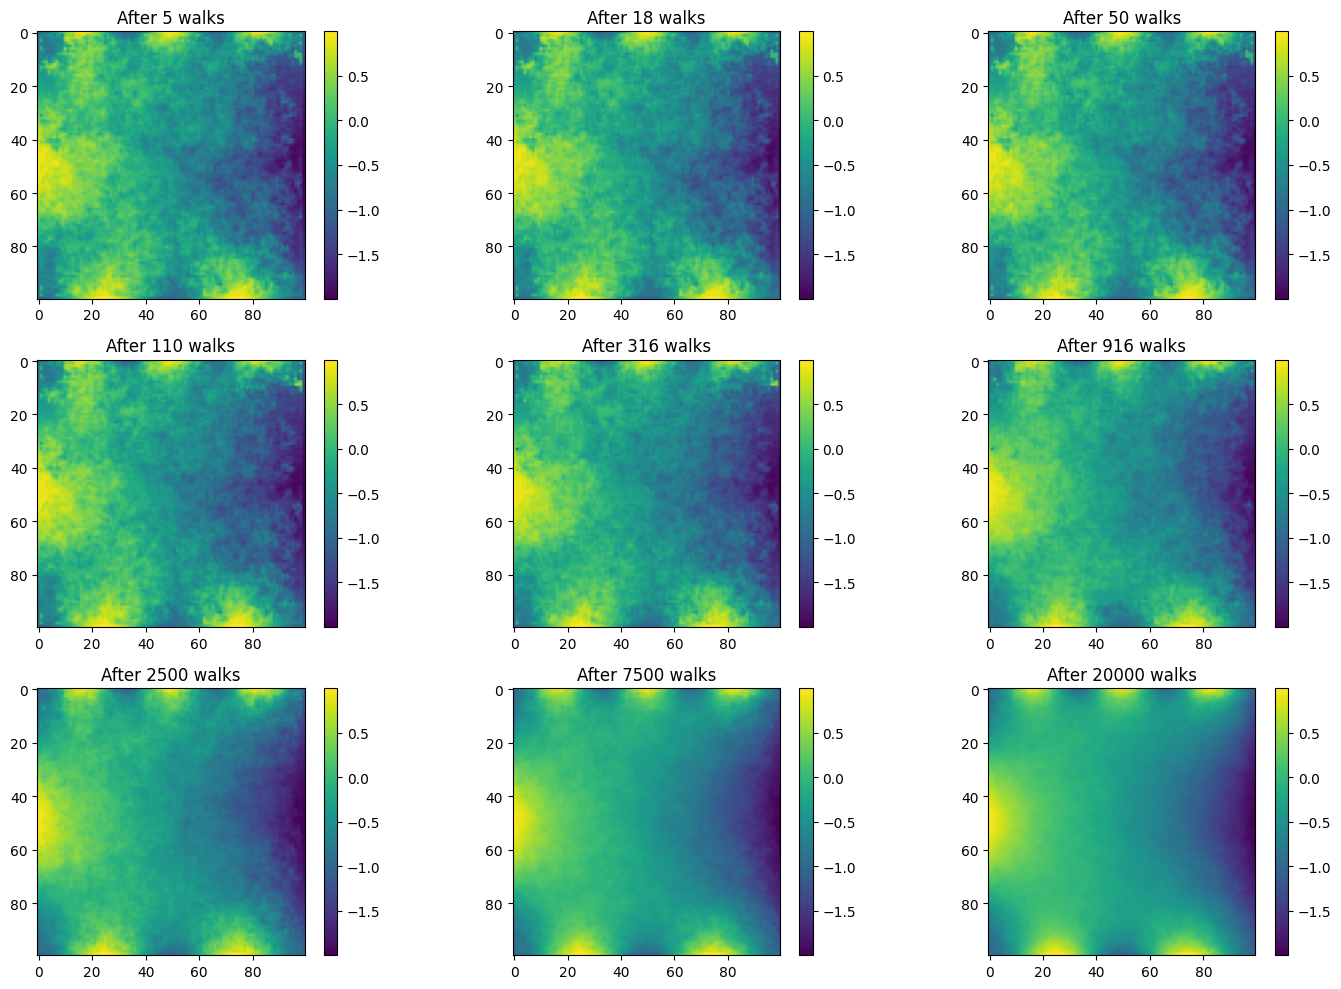

In [40]:
S = 100
num_walks = 20010

walks = [5, 18, 50, 110, 316, 916, 2500, 7500, 20000]
current_walk = 0
fig, axes = plt.subplots(ncols=3, nrows=(len(walks) + 2) // 3, figsize=(15, 10))
plt.ion()

def random_walk():
    x, y = np.random.randint(1, S-1), np.random.randint(1, S-1)
    path = [(x, y)]

    while True:
        direction = np.random.choice(['up', 'down', 'left', 'right'])
        if direction == 'up':
            x -= 1
        elif direction == 'down':
            x += 1
        elif direction == 'left':
            y -= 1
        elif direction == 'right':
            y += 1

        if x == 0 or x == S-1 or y == 0 or y == S-1:
            boundary_value = plane[x, y]
            break
        else:
            path.append((x, y))

    for (px, py) in path:
        plane_counts[px, py] += 1
        plane[px, py] = (plane_counts[px, py] * plane[px, py] + boundary_value) / (plane_counts[px, py] + 1)

for walk in range(num_walks):
    random_walk()

    if walk in walks:
        ax = axes.flat[current_walk]
        ax.clear()
        ax.set_title(f"After {walk} walks")
        im = ax.imshow(plane, cmap='viridis')
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        current_walk += 1

plt.tight_layout()
plt.show()



In [ ]:
#Animation code for testing purposes. May not work on your machine.


%matplotlib qt

import matplotlib.animation as animation

fig = plt.figure()
plt.title("0 walks")
im = plt.imshow(planes[0])
im.set_array(planes[0])

# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(planes[j])
    plt.title("{0} walks".format(walks[j]))
    return [im]
# kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(1000), interval=1000)
plt.show()